<a href="https://colab.research.google.com/github/krish08jack/task-7-spark-foundataion/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ######Stock Market Prediction using Numerical - #########

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving ^BSESN 1.csv to ^BSESN 1.csv


In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df_prices = pd.read_csv('^BSESN 1.csv')
print(df_prices.head())
print(df_prices.size)

       Date  date value         Open  ...        Close    Adj Close  Volume
0  12/19/19       43818  41571.82031  ...  41673.92188  41673.92188   33300
1  12/20/19       43819  41746.19922  ...  41681.53906  41681.53906   33600
2  12/23/19       43822  41548.26172  ...  41642.66016  41642.66016    6200
3  12/24/19       43823  41684.51172  ...  41461.26172  41461.26172    4400
4  12/26/19       43825  41543.80078  ...  41163.76172  41163.76172    5600

[5 rows x 8 columns]
2008


In [ ]:

df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    datetime64[ns]
 1   date value  251 non-null    int64         
 2   Open        251 non-null    float64       
 3   High        251 non-null    float64       
 4   Low         251 non-null    float64       
 5   Close       251 non-null    float64       
 6   Adj Close   251 non-null    float64       
 7   Volume      251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 15.8 KB


In [ ]:
df_prices.dropna(inplace = True)

Text(0, 0.5, 'Close')

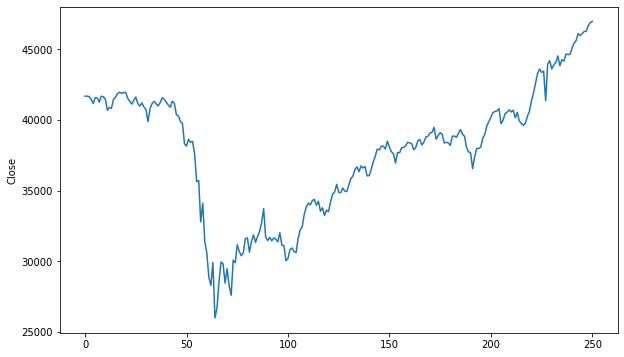

In [ ]:

plt.figure(figsize=(10, 6))
df_prices['Close'].plot()
plt.ylabel('Close')

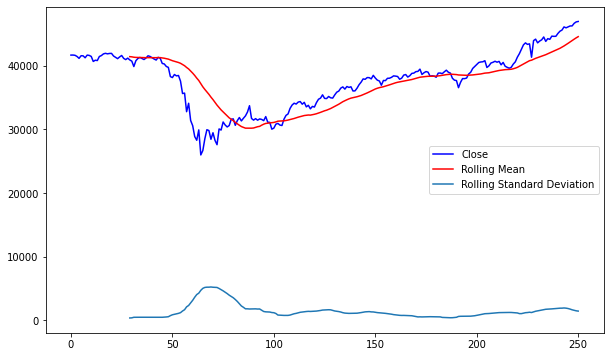

In [ ]:
 #Plotting moving average
close = df_prices['Close']
ma = close.rolling(window = 30).mean()
std = close.rolling(window = 30).std()

plt.figure(figsize=(10, 6))
df_prices['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

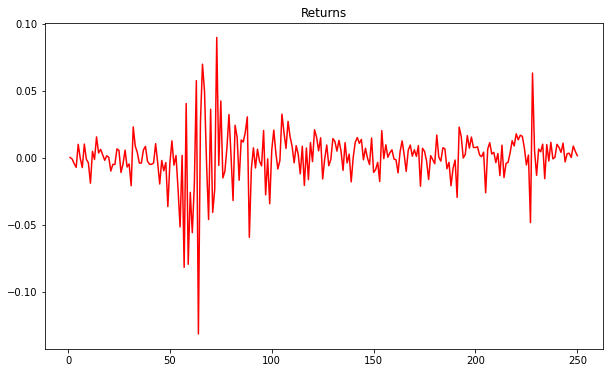

In [ ]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'r')
plt.title("Returns")

In [ ]:
train = df_prices[:1000]
test = df_prices[1000:]

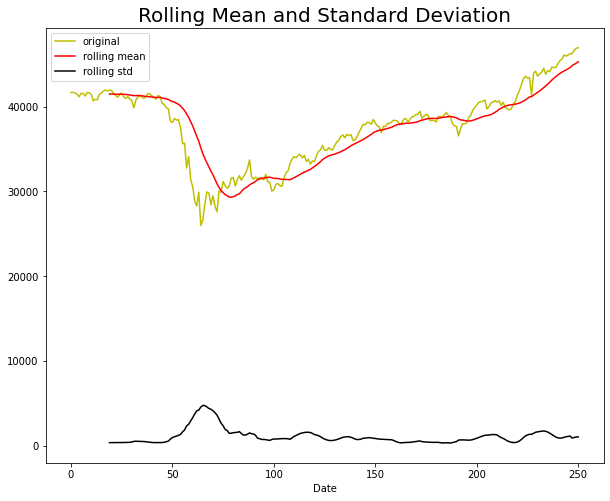

Results of dickey fuller test
ADF Test Statistic : -0.7115291089249717
p-value : 0.8437405948651086
#Lags Used : 6
Number of Observations Used : 244
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
#Stationarity test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()

    #Plot rolling statistics:
    plt.figure(figsize = (10,8))
    plt.plot(timeseries, color = 'y', label = 'original')
    plt.plot(rolmean, color = 'r', label = 'rolling mean')
    plt.plot(rolstd, color = 'black', label = 'rolling std')
    plt.xlabel('Date')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
    plt.show(block = False)
 
    print('Results of dickey fuller test')
    result = adfuller(timeseries, autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])


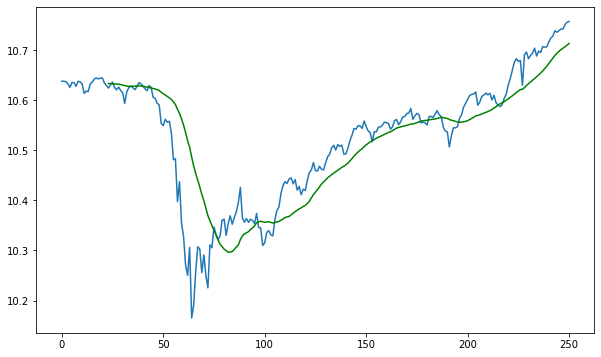

In [ ]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'green')

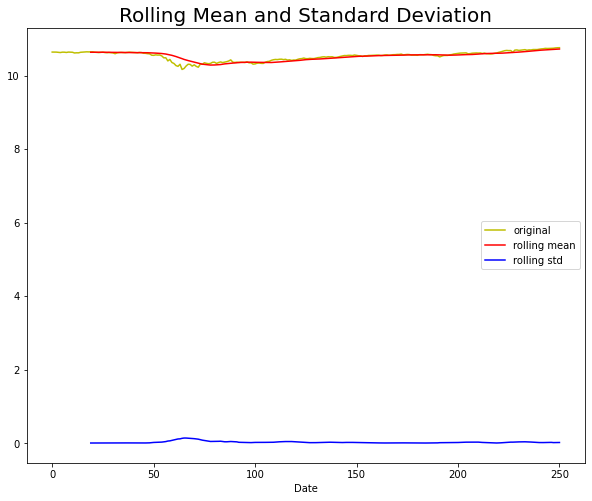

Results of dickey fuller test
ADF Test Statistic : -1.1471098002622155
p-value : 0.6959243357188414
#Lags Used : 7
Number of Observations Used : 243
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)


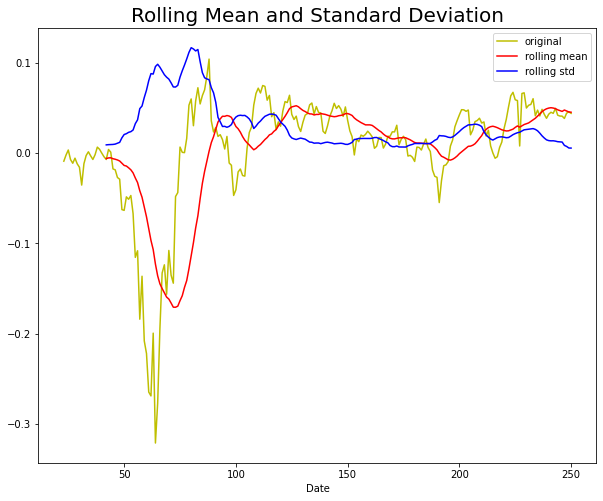

Results of dickey fuller test
ADF Test Statistic : -3.0027306900281903
p-value : 0.03464017391417181
#Lags Used : 7
Number of Observations Used : 220
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)